# Pyam Integration

*Note: This notebook will eventually show how OpenSCM integrates with Pyam. For now it's just a very basic sketch of how the integration will work.

Here we make use of the direct connection to the IIASA database made available in Pyam.

In [0]:
# NBVAL_IGNORE_OUTPUT
import pyam
import seaborn as sns
sns.set(style="darkgrid")

# from openscm.scmdataframe import ScmDataFrame  # uncomment when implemented

In [0]:
df_pyam = pyam.read_iiasa_iamc15(
    model="MESSAGEix*", 
    variable=["Emissions*"], 
)
# cast to ScmDataFrame here instead when implemented
# df = ScmDataFrame(df_pyam)

INFO:root:You are connected to the iamc15 scenario explorer. Please cite as:

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al., IAMC 1.5C Scenario Explorer and Data hosted by IIASA. IIASA & IAMC, 2018. doi: 10.22022/SR15/08-2018.15429, url: data.ene.iiasa.ac.at/iamc-1.5c-explorer


In [0]:
type(df_pyam)

pyam.core.IamDataFrame

In [0]:
df_pyam.variables()

0                                          Emissions|BC
1                                         Emissions|CH4
2                                   Emissions|CH4|AFOLU
3                                  Emissions|CH4|Energy
4                                         Emissions|CO2
5                                   Emissions|CO2|AFOLU
6                                  Emissions|CO2|Energy
7         Emissions|CO2|Energy and Industrial Processes
8                           Emissions|CO2|Energy|Demand
9                  Emissions|CO2|Energy|Demand|Industry
10    Emissions|CO2|Energy|Demand|Residential and Co...
11                          Emissions|CO2|Energy|Supply
12              Emissions|CO2|Energy|Supply|Electricity
13                                    Emissions|F-Gases
14                                Emissions|Kyoto Gases
15                   Emissions|Kyoto Gases (AR4-GWP100)
16                   Emissions|Kyoto Gases (AR5-GWP100)
17                   Emissions|Kyoto Gases (SAR-

In [0]:
df_pyam.regions()

0         R5ASIA
1          R5LAM
2          R5MAF
3    R5OECD90+EU
4          R5REF
5          World
Name: region, dtype: object

In [0]:
df_pyam.scenarios()

0           CD-LINKS_INDCi
1             CD-LINKS_NPi
2    CD-LINKS_NPi2020_1000
3    CD-LINKS_NPi2020_1600
4     CD-LINKS_NPi2020_400
5        CD-LINKS_NoPolicy
6          LowEnergyDemand
Name: scenario, dtype: object

In [0]:
df_pyam.data.columns

Index(['model', 'region', 'scenario', 'unit', 'value', 'variable', 'year'], dtype='object')

Pyam's plotting functions provide great defaults for making all sorts of informative plots.

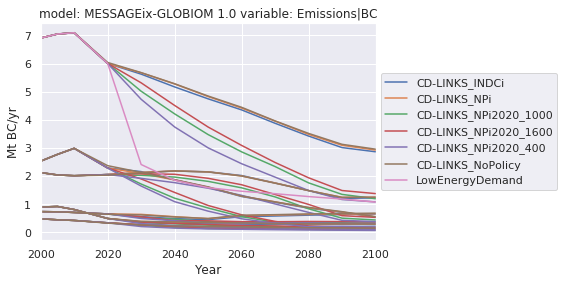

In [0]:
df_pyam.filter(variable='Emissions|BC').line_plot(
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
);

The use of a PandasDataFrame underneath the hood makes integration with other tools, like seaborn, trivial.

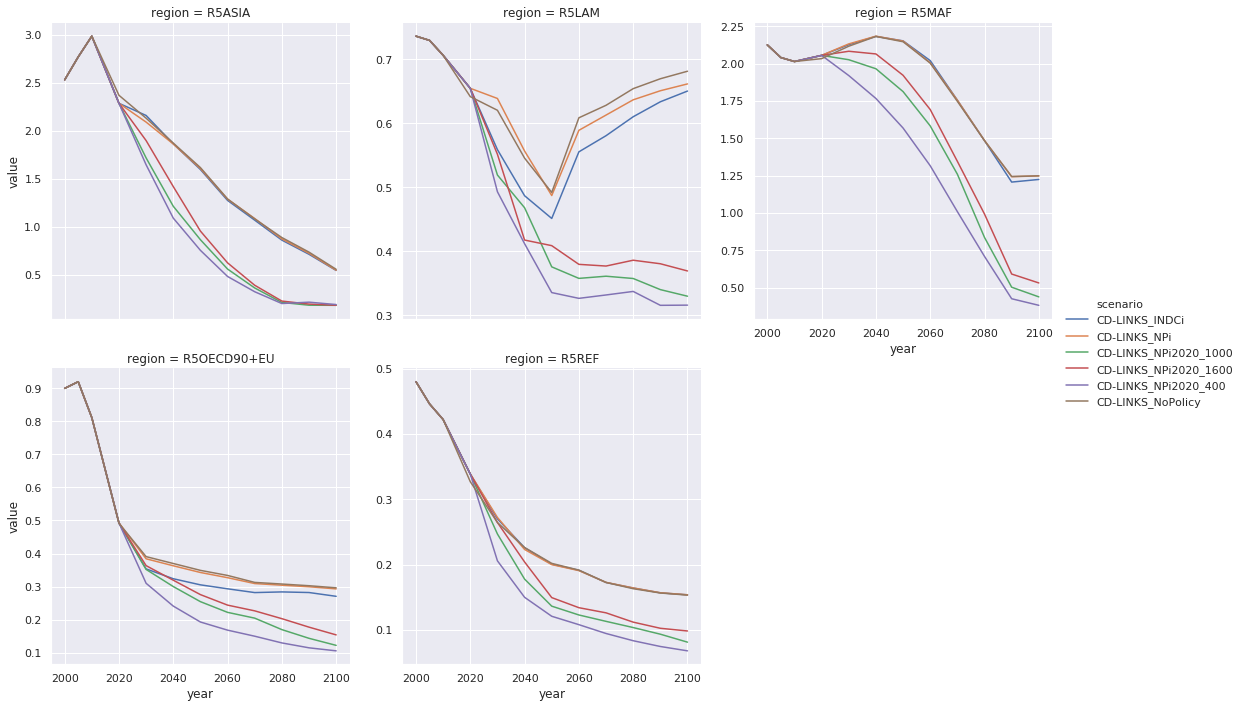

In [0]:
emissions_bc = df_pyam.filter(
    variable="Emissions|BC"
).filter(
    region="World",
    keep=False
).data
sns.relplot(
    x="year",
    y="value",
    kind="line",
    col="region",
    col_wrap=3,
    hue="scenario",
    data=emissions_bc,
    ci=None,
    facet_kws={"sharey": False},
);